In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline
import matplotlib.pyplot as plt
import re
import string
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

In [2]:
speeches = pd.read_pickle('A:\\Data Analysis Jupyter\\Campaign-Analytics\\Code\\Cleaning and Wrangling\\speeches.pkl')

In [3]:
speeches.head()

,Year,Month,Day,Title,Speech,Date,no_punct,tokens,no_stopwords,nltk_Text
0,2010,10,29,2018\29_10_2010_PM’s address at Indian Communi...,"Hello!A country like Japan, this atmosphere of...",2010-10-29,helloa country like japan this atmosphere of t...,"[helloa, country, like, japan, this, atmospher...","[helloa, country, like, japan, atmosphere, aik...","(helloa, country, like, japan, atmosphere, aik..."
1,2014,10,2,2014\1_02_Oct_2014_Text_of_PMs_address_during_...,à¤­à¤¾à¤°à¤¤ à¤®à¤¾à¤¤à¤¾ à¤à¥ à¤à¤¯!à¤®à¤¹...,2014-10-02,à¤­à¤¾à¤°à¤¤ à¤®à¤¾à¤¤à¤¾ à¤à¥ à¤à¤¯à¤®à¤¹à...,"[à¤­à¤¾à¤°à¤¤, à¤®à¤¾à¤¤à¤¾, à¤à¥, à¤à¤¯à¤®...","[à¤­à¤¾à¤°à¤¤, à¤®à¤¾à¤¤à¤¾, à¤à¥, à¤à¤¯à¤®...","(à¤­à¤¾à¤°à¤¤, à¤®à¤¾à¤¤à¤¾, à¤à¥, à¤à¤¯à¤®..."
2,2014,10,3,2014\2_03_Oct_2014_Text_of_PMs_first_Mann_ki_B...,à¤®à¥à¤°à¥ à¤ªà¥à¤¯à¤¾à¤°à¥ à¤¦à¥à¤¶à¤µà¤...,2014-10-03,à¤®à¥à¤°à¥ à¤ªà¥à¤¯à¤¾à¤°à¥ à¤¦à¥à¤¶à¤µà¤...,"[à¤®à¥à¤°à¥, à¤ªà¥à¤¯à¤¾à¤°à¥, à¤¦à¥à¤¶à¤...","[à¤®à¥à¤°à¥, à¤ªà¥à¤¯à¤¾à¤°à¥, à¤¦à¥à¤¶à¤...","(à¤®à¥à¤°à¥, à¤ªà¥à¤¯à¤¾à¤°à¥, à¤¦à¥à¤¶à¤..."
3,2014,10,3,2014\3_03_Oct_2014_English_rendering_of_text_o...,"My Dear Countrymen,Today is the holy festival ...",2014-10-03,my dear countrymentoday is the holy festival o...,"[my, dear, countrymentoday, is, the, holy, fes...","[dear, countrymentoday, holy, festival, vijay,...","(dear, countrymentoday, holy, festival, vijay,..."
4,2014,10,11,2014\6_11_Oct_2014_PMs_remarks_at_the_launch_o...,"Prime Minister, Shri Narendra Modi, today laun...",2014-10-11,prime minister shri narendra modi today launch...,"[prime, minister, shri, narendra, modi, today,...","[prime, minister, shri, narendra, modi, today,...","(prime, minister, shri, narendra, modi, today,..."


## Number of available speeches

In [4]:
len(speeches)

522

## Number of days in which at least one speech was given.

In [5]:
len(speeches.Date.unique())

385

## Maximum number of speeches in a day 


In [6]:
speeches['Date'].value_counts()

2015-11-12    4
2015-05-15    4
2018-10-21    4
2016-11-11    3
2016-07-11    3
2015-05-16    3
2017-05-12    3
2016-04-24    3
2016-11-13    3
2016-10-31    3
2016-03-12    3
2016-05-23    3
2015-05-17    3
2017-01-09    3
2016-02-21    3
2017-03-07    3
2015-06-28    3
2016-07-10    3
2015-07-09    3
2015-02-14    2
2014-11-30    2
2014-11-16    2
2019-02-17    2
2018-06-21    2
2017-06-24    2
2019-02-24    2
2015-05-31    2
2018-06-22    2
2017-04-08    2
2015-06-07    2
             ..
2017-01-11    1
2016-10-11    1
2017-01-07    1
2015-12-29    1
2016-03-03    1
2016-11-12    1
2015-03-14    1
2015-01-11    1
2018-06-15    1
2017-02-21    1
2015-10-31    1
2017-06-01    1
2018-09-26    1
2016-06-07    1
2016-08-08    1
2016-12-10    1
2015-12-21    1
2017-04-13    1
2017-08-15    1
2015-05-04    1
2016-10-26    1
2015-09-05    1
2015-11-06    1
2017-04-28    1
2016-01-16    1
2016-03-09    1
2017-07-01    1
2016-12-25    1
2015-09-03    1
2019-02-21    1
Name: Date, Length: 385,

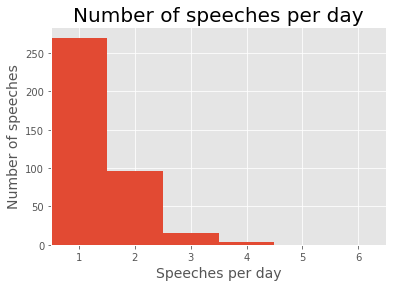

In [7]:
by_date = speeches['Date'].value_counts()
plt.style.use('ggplot')
by_date.plot.hist(bins=range(1,9), align='left')
plt.xticks(range(1,8))
plt.xlim(0.5, 6.5)
plt.title("Number of speeches per day", fontdict={'fontsize': 20})
plt.ylabel("Number of speeches", fontdict={'fontsize': 14})
plt.xlabel("Speeches per day", fontdict={'fontsize': 14});

## Number of speeches per day of a week

In [8]:
# getting day ofweek with dt method
speeches['Day'] = speeches['Date'].dt.dayofweek

# dictionary to label 
days = {0:'Monday', 1:'Tuesday', 2:'Wednsday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

# function to label corresponing categoricalvariable with name of the weekday
speeches['Day'] = speeches['Day'].apply(lambda x:days[x])

In [9]:
# ordering the leves of factor variables
speeches['Day'] = pd.Categorical(speeches['Day'], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [10]:
by_weekday = speeches['Day'].value_counts().sortlevel()
by_weekday

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  """Entry point for launching an IPython kernel.


Monday        73
Tuesday       58
Wednesday      0
Thursday      59
Friday        90
Saturday      79
Sunday       118
Name: Day, dtype: int64

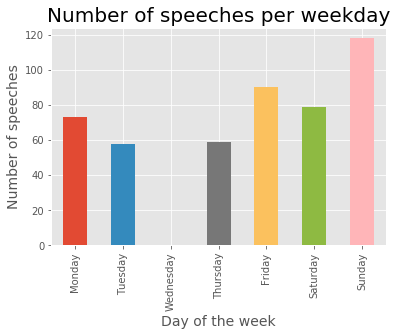

In [11]:
by_weekday.plot.bar()
plt.title("Number of speeches per weekday", fontdict={'fontsize': 20})
plt.ylabel("Number of speeches", fontdict={'fontsize': 14})
plt.xlabel("Day of the week", fontdict={'fontsize': 14});

## Number of speeches per month 

In [12]:
by_month = speeches['Month'].value_counts().sort_index()
by_month

1     47
2     58
3     29
4     40
5     49
6     52
7     46
8     27
9     30
10    53
11    62
12    29
Name: Month, dtype: int64

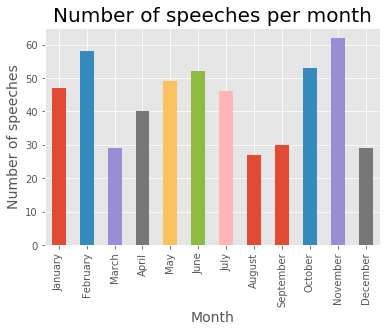

In [13]:
by_month.plot.bar()
plt.title("Number of speeches per month", fontdict={'fontsize': 20})
plt.ylabel("Number of speeches", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.xticks(range(12), labels, rotation='vertical');

## Number of speeches per year

In [14]:
by_year = speeches['Year'].value_counts().sort_index()
by_year

2010      1
2014     38
2015    148
2016    160
2017     92
2018     43
2019     40
Name: Year, dtype: int64

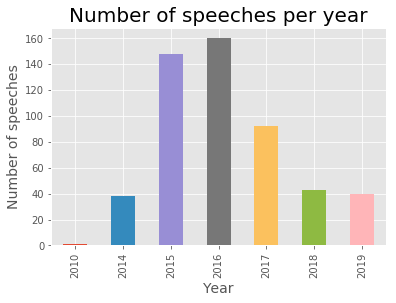

In [15]:
by_year.plot.bar()
plt.title("Number of speeches per year", fontdict={'fontsize': 20})
plt.ylabel("Number of speeches", fontdict={'fontsize': 14})
plt.xlabel("Year", fontdict={'fontsize': 14})
labels = ['2010','2014','2015','2016','2017','2018','2019']
plt.xticks(range(7), labels, rotation='vertical');

In [16]:
by_year_month = pd.groupby(speeches, by=[speeches['Date'].dt.year, speeches['Date'].dt.month])

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  """Entry point for launching an IPython kernel.


In [17]:
month_labels = ['2014-1','2014-2','2014-3','2014-4','2014-5','2014-6','2014-7','2014-8','2014-9','2014-10','2014-11','2014-12',\
          '2015-1','2015-2','2015-3','2015-4','2015-5','2015-6','2015-7','2015-8','2015-9','2015-10','2015-11','2015-12',\
          '2016-1','2016-2','2016-3','2016-4','2016-5','2016-6','2016-7','201-8','2016-9','2016-10','2016-11','2016-12',\
          '2017-1','2017-2','2017-3','2017-4','2017-5','2017-6','2017-7','2017-8','2017-9','2017-10','2017-11','2017-12',\
          '2018-1','2018-2','2018-3','2018-4','2018-5','2018-6','2018-7','2018-8','2018-9','2018-10','2018-11','2018-12',\
          '2019-1','2019-2','2019-3']

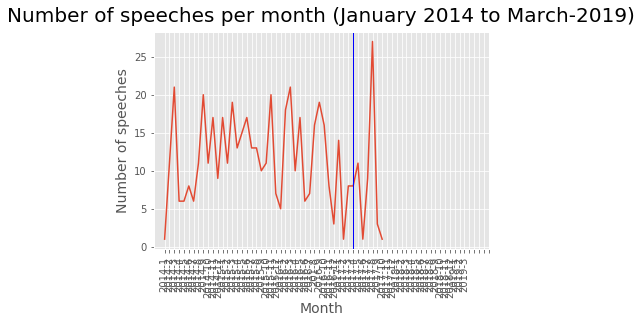

In [18]:
by_month = by_year_month['Month'].agg('count')
by_month.plot()
plt.title("Number of speeches per month (January 2014 to March-2019)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of speeches", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(68), labels, rotation='vertical')
plt.axvline(x=39, linewidth=1, color='b');

In [19]:
speeches.head(10)

,Year,Month,Day,Title,Speech,Date,no_punct,tokens,no_stopwords,nltk_Text
0,2010,10,Friday,2018\29_10_2010_PM’s address at Indian Communi...,"Hello!A country like Japan, this atmosphere of...",2010-10-29,helloa country like japan this atmosphere of t...,"[helloa, country, like, japan, this, atmospher...","[helloa, country, like, japan, atmosphere, aik...","(helloa, country, like, japan, atmosphere, aik..."
1,2014,10,Thursday,2014\1_02_Oct_2014_Text_of_PMs_address_during_...,à¤­à¤¾à¤°à¤¤ à¤®à¤¾à¤¤à¤¾ à¤à¥ à¤à¤¯!à¤®à¤¹...,2014-10-02,à¤­à¤¾à¤°à¤¤ à¤®à¤¾à¤¤à¤¾ à¤à¥ à¤à¤¯à¤®à¤¹à...,"[à¤­à¤¾à¤°à¤¤, à¤®à¤¾à¤¤à¤¾, à¤à¥, à¤à¤¯à¤®...","[à¤­à¤¾à¤°à¤¤, à¤®à¤¾à¤¤à¤¾, à¤à¥, à¤à¤¯à¤®...","(à¤­à¤¾à¤°à¤¤, à¤®à¤¾à¤¤à¤¾, à¤à¥, à¤à¤¯à¤®..."
2,2014,10,Friday,2014\2_03_Oct_2014_Text_of_PMs_first_Mann_ki_B...,à¤®à¥à¤°à¥ à¤ªà¥à¤¯à¤¾à¤°à¥ à¤¦à¥à¤¶à¤µà¤...,2014-10-03,à¤®à¥à¤°à¥ à¤ªà¥à¤¯à¤¾à¤°à¥ à¤¦à¥à¤¶à¤µà¤...,"[à¤®à¥à¤°à¥, à¤ªà¥à¤¯à¤¾à¤°à¥, à¤¦à¥à¤¶à¤...","[à¤®à¥à¤°à¥, à¤ªà¥à¤¯à¤¾à¤°à¥, à¤¦à¥à¤¶à¤...","(à¤®à¥à¤°à¥, à¤ªà¥à¤¯à¤¾à¤°à¥, à¤¦à¥à¤¶à¤..."
3,2014,10,Friday,2014\3_03_Oct_2014_English_rendering_of_text_o...,"My Dear Countrymen,Today is the holy festival ...",2014-10-03,my dear countrymentoday is the holy festival o...,"[my, dear, countrymentoday, is, the, holy, fes...","[dear, countrymentoday, holy, festival, vijay,...","(dear, countrymentoday, holy, festival, vijay,..."
4,2014,10,Saturday,2014\6_11_Oct_2014_PMs_remarks_at_the_launch_o...,"Prime Minister, Shri Narendra Modi, today laun...",2014-10-11,prime minister shri narendra modi today launch...,"[prime, minister, shri, narendra, modi, today,...","[prime, minister, shri, narendra, modi, today,...","(prime, minister, shri, narendra, modi, today,..."
5,2014,10,Saturday,2014\5_11_Oct_2014_Text_of_PMs_address_at_the_...,à¤®à¤à¤¤à¥à¤°à¤¿à¤ªà¤°à¤¿à¤·à¤¦ à¤à¥ à¤®à¥...,2014-10-11,à¤®à¤à¤¤à¥à¤°à¤à¤ªà¤°à¤à¤·à¤¦ à¤à¥ à¤®à¥à...,"[à¤®à¤à¤¤à¥à¤°à¤à¤ªà¤°à¤à¤·à¤¦, à¤à¥, à¤®à...","[à¤®à¤à¤¤à¥à¤°à¤à¤ªà¤°à¤à¤·à¤¦, à¤à¥, à¤®à...","(à¤®à¤à¤¤à¥à¤°à¤à¤ªà¤°à¤à¤·à¤¦, à¤à¥, à¤®à..."
6,2014,10,Tuesday,2014\8_14_Oct_2014_Text_of_PMs_statement_after...,à¤ªà¤°à¤¸à¥à¤ à¤à¥ à¤­à¤¯à¤à¤à¤° cyclone...,2014-10-14,à¤ªà¤°à¤¸à¥à¤ à¤à¥ à¤­à¤¯à¤à¤à¤° cyclone...,"[à¤ªà¤°à¤¸à¥à¤, à¤à¥, à¤­à¤¯à¤à¤à¤°, cyc...","[à¤ªà¤°à¤¸à¥à¤, à¤à¥, à¤­à¤¯à¤à¤à¤°, cyc...","(à¤ªà¤°à¤¸à¥à¤, à¤à¥, à¤­à¤¯à¤à¤à¤°, cyc..."
7,2014,10,Thursday,2014\9_16_Oct_2014_Text_of_PMs_address_during_...,à¤à¤ªà¤¸à¥à¤¥à¤¿à¤¤ à¤¸à¤­à¥ à¤®à¤¹à¤¾à¤¨à¥...,2014-10-16,à¤à¤ªà¤¸à¥à¤¥à¤à¤¤ à¤¸à¤­à¥ à¤®à¤¹à¤¾à¤¨à¥...,"[à¤à¤ªà¤¸à¥à¤¥à¤à¤¤, à¤¸à¤­à¥, à¤®à¤¹à¤¾à¤¨...","[à¤à¤ªà¤¸à¥à¤¥à¤à¤¤, à¤¸à¤­à¥, à¤®à¤¹à¤¾à¤¨...","(à¤à¤ªà¤¸à¥à¤¥à¤à¤¤, à¤¸à¤­à¥, à¤®à¤¹à¤¾à¤¨..."
8,2014,10,Thursday,2014\11_23_Oct_2014_Text_of_PMs_address_to_Off...,"प्‍यारे जवानों,आप सबको बड़ा सरप्राइज हुआ होगा ...",2014-10-23,प्‍यारे जवानोंआप सबको बड़ा सरप्राइज हुआ होगा क...,"[प्‍यारे, जवानोंआप, सबको, बड़ा, सरप्राइज, हुआ,...","[प्‍यारे, जवानोंआप, सबको, बड़ा, सरप्राइज, हुआ,...","(प्‍यारे, जवानोंआप, सबको, बड़ा, सरप्राइज, हुआ,..."
9,2014,10,Saturday,2014\12_25_Oct_2014_Text_of_PMs_address_at_the...,à¤à¤ªà¤¸à¥à¤¥à¤¿âà¤¤ à¤¸à¤­à¥ à¤µà¤°à¤¿à¤...,2014-10-25,à¤à¤ªà¤¸à¥à¤¥à¤âà¤¤ à¤¸à¤­à¥ à¤µà¤°à¤à¤·à...,"[à¤à¤ªà¤¸à¥à¤¥à¤âà¤¤, à¤¸à¤­à¥, à¤µà¤°à¤à...","[à¤à¤ªà¤¸à¥à¤¥à¤âà¤¤, à¤¸à¤­à¥, à¤µà¤°à¤à...","(à¤à¤ªà¤¸à¥à¤¥à¤âà¤¤, à¤¸à¤­à¥, à¤µà¤°à¤à..."


### Word Cloud

In [20]:
# add all speeches into one string 

all_speeches = speeches.Speech.str.cat(sep=',')

In [21]:
punctuation = string.punctuation + '–¡¿”“•\r´'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–¡¿”“•\r´'

In [22]:
# To strip punctuation from string

def no_punct(string):
    transtable = string.maketrans('', '', punctuation)
    return string.translate(transtable)

In [23]:
all_speeches = no_punct(all_speeches)

In [24]:
# Lowercase

all_speeches = all_speeches.lower()

In [25]:
len(all_speeches)

10095332

In [26]:
# Tokenize text

all_tokens = word_tokenize(all_speeches)

In [31]:
# Eliminate stopwords in English

def no_stopwords(tokens):
    return [w for w in tokens if w not in stopwords_eng]

In [30]:
stopwords_eng = stopwords.words('english')

In [32]:
# drop stopwords
all_tokens = no_stopwords(all_tokens)

In [33]:
len(all_tokens)

1007495

In [34]:
# See sorted frequency distribution of all tokens

nltk.FreqDist(all_tokens).most_common()

[('à¤\x95à¥\x87', 15355),
 ('à¤¹à¥\x88', 13158),
 ('à¤', 13057),
 ('à¤®à¥\x87à¤\x82', 11932),
 ('à¤\x94à¤°', 8714),
 ('à¤\x95à¥\x8b', 8323),
 ('à¤\x95à¥\x80', 8117),
 ('à¤¹à¥\x88à¥¤', 7652),
 ('à¤\x95à¤¾', 7515),
 ('à¤¸à¥\x87', 7434),
 ('के', 6432),
 ('à¤\xadà¥\x80', 5898),
 ('है', 5681),
 ('à¤\x95à¤', 5560),
 ('à¤\x8fà¤\x95', 5426),
 ('à¤¤à¥\x8b', 5372),
 ('à¤¨à¤¹à¥\x80à¤\x82', 5177),
 ('में', 4879),
 ('india', 4606),
 ('à¤¹à¥\x88à¤\x82', 4490),
 ('à¤¯à¥\x87', 4176),
 ('à¤¹à¥\x8b', 3804),
 ('à¤¹à¤®', 3769),
 ('«', 3692),
 ('à¤²à¤à¤\x8f', 3600),
 ('à¤®à¥\x88à¤\x82', 3548),
 ('को', 3440),
 ('और', 3365),
 ('की', 3350),
 ('का', 3303),
 ('à¤\x9cà¥\x8b', 3280),
 ('है।', 3013),
 ('à¤µà¥\x8b', 3001),
 ('से', 2915),
 ('also', 2850),
 ('pm', 2763),
 ('à¤ªà¤°', 2738),
 ('à¤¦à¥\x87à¤¶', 2641),
 ('à¤\x95à¤°', 2398),
 ('à¤¹à¥\x88à¤\x82à¥¤', 2393),
 ('à¤\x87à¤¸', 2349),
 ('people', 2262),
 ('à¤²à¥\x87à¤\x95à¤à¤¨', 2257),
 ('कि', 2178),
 ('भी', 2171),
 ('à¤¨à¥\x87', 2144),
 ('एक', 2130),
 ('à¤¬à¤¹à¥\